# Customer Analysis - with Activity 5 

## Importing and general cleaning

Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### We define a series of functions for our data cleaning pipe:

In [3]:
#Function for reading the data:
def read_customer_data():
    return pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv")


In [4]:
#Function for standardizing column names:
def standardize(df):
    new_columns = df.columns.str.lower().str.replace(" ", "_")
    df.columns = new_columns
    return df

In [5]:
#Function for dropping customer and unnamed:_0 columns
def drop_2cols(df):
    df.drop(columns=["unnamed:_0", "customer"], inplace=True)
    return df

In [6]:
#Drop duplicates and reset index
def dd(df):
    df = df.drop_duplicates().reset_index()
    df.drop(columns=["index"], inplace=True)
    return df

In [7]:
#Replacing null values
def fill_null(df):
    df["number_of_open_complaints"] = df["number_of_open_complaints"].fillna(value=0)
    mean_months = round(df["months_since_last_claim"].mean())
    df["months_since_last_claim"] = df["months_since_last_claim"].fillna(value=mean_months)
    mean_income = round(df["income"].mean())
    df["income"] = df["income"].fillna(value=mean_income)
    return df

## Running the pipe

In [8]:
df = read_customer_data().pipe(standardize).pipe(drop_2cols).pipe(dd).pipe(fill_null)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          10163 non-null  object 
 1   customer_lifetime_value        10776 non-null  float64
 2   response                       10163 non-null  object 
 3   coverage                       10776 non-null  object 
 4   education                      10776 non-null  object 
 5   effective_to_date              10776 non-null  object 
 6   employmentstatus               10776 non-null  object 
 7   gender                         10776 non-null  object 
 8   income                         10776 non-null  int64  
 9   location_code                  10776 non-null  object 
 10  marital_status                 10776 non-null  object 
 11  monthly_premium_auto           10776 non-null  int64  
 12  months_since_last_claim        10776 non-null 

## Activity 2

Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

In [9]:
df1 = df.copy()

In [10]:
df1["state"].value_counts()

California    3512
Oregon        2861
Arizona       1918
Nevada         987
Washington     885
Name: state, dtype: int64

In [11]:
def region(x):
    if x != x:
        return x
    else:
        dic = {"California": "West Region", "Oregon": "North West", "Washington": "East",
               "Arizona": "Central", "Nevada": "Central"}
        return dic[x]
    
df1["region"] = df1["state"].apply(region)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          10163 non-null  object 
 1   customer_lifetime_value        10776 non-null  float64
 2   response                       10163 non-null  object 
 3   coverage                       10776 non-null  object 
 4   education                      10776 non-null  object 
 5   effective_to_date              10776 non-null  object 
 6   employmentstatus               10776 non-null  object 
 7   gender                         10776 non-null  object 
 8   income                         10776 non-null  int64  
 9   location_code                  10776 non-null  object 
 10  marital_status                 10776 non-null  object 
 11  monthly_premium_auto           10776 non-null  int64  
 12  months_since_last_claim        10776 non-null 

In [12]:
df1["region"].value_counts()

West Region    3512
Central        2905
North West     2861
East            885
Name: region, dtype: int64

# Activity 3

Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [13]:
df2 = df1.copy()


In [14]:
df2["effective_to_date"]

0        2/18/11
1        1/18/11
2        2/10/11
3        1/11/11
4        1/17/11
          ...   
10771    1/19/11
10772     1/6/11
10773     2/6/11
10774    2/13/11
10775     1/8/11
Name: effective_to_date, Length: 10776, dtype: object

In [15]:
#Storing the new dates column:
df2["date_column"] = pd.to_datetime(df2["effective_to_date"])
df2["date_column"].value_counts()

2011-01-27    238
2011-01-10    236
2011-01-17    220
2011-01-26    217
2011-02-14    217
2011-01-31    217
2011-01-19    212
2011-01-03    211
2011-02-27    202
2011-01-28    199
2011-02-04    198
2011-01-21    198
2011-02-26    197
2011-01-20    195
2011-02-19    195
2011-02-07    194
2011-01-11    193
2011-02-03    193
2011-01-05    190
2011-02-22    189
2011-02-28    188
2011-01-02    186
2011-02-10    184
2011-02-11    183
2011-02-18    183
2011-02-25    182
2011-01-18    182
2011-02-12    181
2011-02-02    181
2011-01-23    180
2011-01-29    179
2011-01-08    179
2011-01-14    178
2011-02-01    178
2011-02-05    178
2011-01-09    177
2011-02-09    177
2011-01-24    176
2011-02-21    175
2011-01-07    175
2011-02-23    173
2011-01-15    172
2011-01-16    172
2011-01-13    171
2011-02-06    170
2011-01-01    168
2011-01-30    168
2011-02-13    167
2011-02-16    166
2011-01-25    166
2011-02-24    162
2011-02-17    160
2011-01-06    160
2011-02-20    156
2011-02-15    155
2011-02-08

In [16]:
df2["month_column"] = df2["date_column"].apply(lambda x: x.month)

In [17]:
df2["month_column"].value_counts()

1    5737
2    5039
Name: month_column, dtype: int64

Get the numeric columns:

In [18]:
df2._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month_column
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,9025.067525,23675,117,15.0,31,0.0,7,707.925645,1
...,...,...,...,...,...,...,...,...,...
10771,15563.369440,0,253,15.0,40,0.0,7,1214.400000,1
10772,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10773,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2
10774,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2


## Converting the strings to lowercase

In [19]:
df3 = df2.copy()

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          10163 non-null  object        
 1   customer_lifetime_value        10776 non-null  float64       
 2   response                       10163 non-null  object        
 3   coverage                       10776 non-null  object        
 4   education                      10776 non-null  object        
 5   effective_to_date              10776 non-null  object        
 6   employmentstatus               10776 non-null  object        
 7   gender                         10776 non-null  object        
 8   income                         10776 non-null  int64         
 9   location_code                  10776 non-null  object        
 10  marital_status                 10776 non-null  object        
 11  monthly_premium

In [21]:
#columns_cat = [df3.columns[2:8] + df3.columns[16:20] + df3.columns[9:11] + df3.columns[21:24]]
list_indexes = list(range(2,7)) + list(range(16,20)) + list(range(9,11)) + list(range(21,24))
df3[df3.columns[list_indexes]] = df3[df3.columns[list_indexes]].applymap(lambda x: x.lower() if x==x else x)
df3

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,region,date_column,month_column
0,Arizona,4809.216960,no,basic,college,2/18/11,employed,M,48029,suburban,...,corporate l3,offer3,agent,292.800000,four-door car,medsize,NaN,Central,2011-02-18,2
1,California,2228.525238,no,basic,college,1/18/11,unemployed,F,0,suburban,...,personal l3,offer4,call center,744.924331,four-door car,medsize,NaN,West Region,2011-01-18,1
2,Washington,14947.917300,no,basic,bachelor,2/10/11,employed,M,22139,suburban,...,personal l3,offer3,call center,480.000000,suv,medsize,a,East,2011-02-10,2
3,Oregon,22332.439460,yes,extended,college,1/11/11,employed,M,49078,suburban,...,corporate l3,offer2,branch,484.013411,four-door car,medsize,a,North West,2011-01-11,1
4,Oregon,9025.067525,no,premium,bachelor,1/17/11,medical leave,F,23675,suburban,...,personal l2,offer1,branch,707.925645,four-door car,medsize,NaN,North West,2011-01-17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,Nevada,15563.369440,no,premium,bachelor,1/19/11,unemployed,F,0,suburban,...,personal l1,offer3,web,1214.400000,luxury car,medsize,a,Central,2011-01-19,1
10772,Oregon,5259.444853,no,basic,college,1/6/11,employed,F,61146,urban,...,personal l3,offer2,branch,273.018929,four-door car,medsize,a,North West,2011-01-06,1
10773,Arizona,23893.304100,no,extended,bachelor,2/6/11,employed,F,39837,rural,...,corporate l3,offer1,web,381.306996,luxury suv,medsize,NaN,Central,2011-02-06,2
10774,California,11971.977650,no,premium,college,2/13/11,employed,F,64195,urban,...,personal l1,offer1,branch,618.288849,suv,medsize,a,West Region,2011-02-13,2


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          10163 non-null  object        
 1   customer_lifetime_value        10776 non-null  float64       
 2   response                       10163 non-null  object        
 3   coverage                       10776 non-null  object        
 4   education                      10776 non-null  object        
 5   effective_to_date              10776 non-null  object        
 6   employmentstatus               10776 non-null  object        
 7   gender                         10776 non-null  object        
 8   income                         10776 non-null  int64         
 9   location_code                  10776 non-null  object        
 10  marital_status                 10776 non-null  object        
 11  monthly_premium

In [23]:
df3.loc[df3["state"] != df3["state"]].loc[df3["response"]!=df3["response"]]

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,region,date_column,month_column
5,NaN,4745.181764,NaN,basic,high school or below,2/14/11,employed,M,50549,suburban,...,personal l3,offer1,agent,292.800000,four-door car,medsize,a,NaN,2011-02-14,2
11,NaN,2420.711888,NaN,basic,bachelor,2/7/11,employed,M,31710,urban,...,corporate l3,offer1,call center,199.551735,two-door car,medsize,NaN,NaN,2011-02-07,2
58,NaN,14019.833140,NaN,basic,college,2/18/11,employed,M,31739,suburban,...,personal l3,offer4,call center,469.882367,two-door car,small,NaN,NaN,2011-02-18,2
62,NaN,2108.493744,NaN,basic,bachelor,1/2/11,unemployed,M,0,suburban,...,personal l2,offer1,agent,351.856810,two-door car,medsize,NaN,NaN,2011-01-02,1
126,NaN,4716.264294,NaN,basic,high school or below,2/25/11,employed,M,25746,suburban,...,corporate l3,offer2,agent,292.800000,four-door car,medsize,a,NaN,2011-02-25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10703,NaN,4978.950257,NaN,basic,bachelor,1/31/11,employed,M,28695,urban,...,corporate l2,offer1,branch,221.241837,four-door car,medsize,a,NaN,2011-01-31,1
10715,NaN,5308.617246,NaN,extended,bachelor,1/24/11,employed,M,40178,suburban,...,special l2,offer1,agent,652.800000,suv,medsize,NaN,NaN,2011-01-24,1
10740,NaN,10036.536340,NaN,extended,high school or below,2/12/11,unemployed,F,0,suburban,...,personal l3,offer1,call center,1353.289060,suv,medsize,NaN,NaN,2011-02-12,2
10760,NaN,6314.492009,NaN,extended,master,2/27/11,employed,F,66947,suburban,...,personal l1,offer3,agent,374.400000,four-door car,small,NaN,NaN,2011-02-27,2


### In the last cell we discovered that each time the state is NaN, the column response is also NaN

In [24]:
for series in df3:
    print(series,"\n",df3[series].value_counts(),"\n")

state 
 California    3512
Oregon        2861
Arizona       1918
Nevada         987
Washington     885
Name: state, dtype: int64 

customer_lifetime_value 
 7507.455372     11
5504.139033     11
5181.620895     10
13727.799720    10
4250.282624     10
                ..
3467.323976      1
14140.558850     1
20018.204590     1
7432.299921      1
11971.977650     1
Name: customer_lifetime_value, Length: 8041, dtype: int64 

response 
 no     8795
yes    1368
Name: response, dtype: int64 

coverage 
 basic       6576
extended    3229
premium      971
Name: coverage, dtype: int64 

education 
 bachelor                3229
college                 3170
high school or below    3105
master                   880
doctor                   392
Name: education, dtype: int64 

effective_to_date 
 1/27/11    238
1/10/11    236
1/17/11    220
1/26/11    217
2/14/11    217
1/31/11    217
1/19/11    212
1/3/11     211
2/27/11    202
1/28/11    199
2/4/11     198
1/21/11    198
2/26/11    197
1/20/11    

## Activity 5 - Data Transformation

#### Get the numeric data into dataframe called numerical

In [26]:
numerical = df.select_dtypes(include=np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,15.0,31,0.0,7,707.925645
...,...,...,...,...,...,...,...,...
10771,15563.369440,0,253,15.0,40,0.0,7,1214.400000
10772,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10773,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10774,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [27]:
df['customer_lifetime_value'].dtypes

dtype('float64')

#### Get the categorial data into dataframe called numerical

In [64]:
categorical = df.select_dtypes(include=np.object)
categorical

<ipython-input-64-1d3c449c450c>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = df.select_dtypes(include=np.object)


,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10772,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10773,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10774,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


#### check the normality of the numerical variables visually

#### Use seaborn library to construct distribution plots for the numerical variables

C:\Users\admin\anaconda3\envs\DA_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


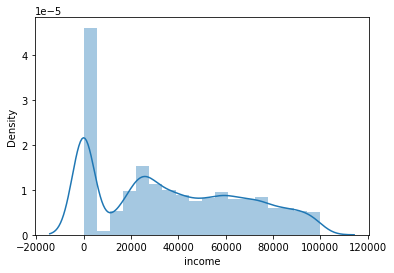

In [29]:
sns.distplot(df.income, hist = True)
plt.show()

C:\Users\admin\anaconda3\envs\DA_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


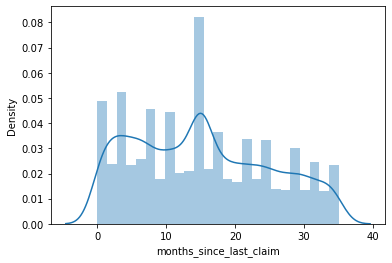

In [30]:
sns.distplot(df.months_since_last_claim, hist = True)
plt.show()


C:\Users\admin\anaconda3\envs\DA_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


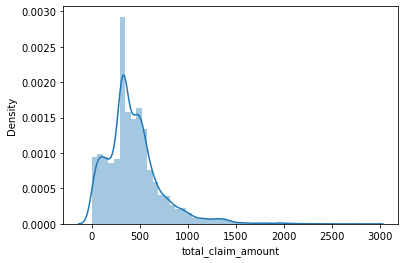

In [31]:
sns.distplot(df.total_claim_amount, hist = True)
plt.show()

In [40]:
sns.distplot(x=df.total_claim_amount, y='total_claim_amount', data=total_claim_amount, kind='reg')
plt.show()

NameError: name 'total_claim_amount' is not defined

In [ ]:
sns.jointplot(x=df.total_claim_amount)

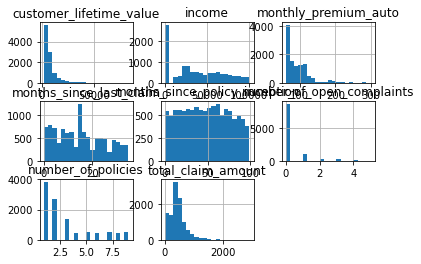

In [32]:
numerical = df.hist(bins=20)

#### Matplotlib to construct histograms

#### distributions for different numerical variables look like a normal distribution

#### normalize

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler()
numerical_scaled = min_max_scaler.fit_transform(numerical)
cs_normalized = pd.DataFrame(numerical_scaled)
cs_normalized

NameError: name 'preprocessing' is not defined

#### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [51]:
correlations = numerical.corr()
print(correlations)
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numerical.corr())
mask[np.triu_indices_from(mask)]=True

fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numerical.corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [35]:
core_df = df.corr()
corr_matrix = np.array(core_df)
unit_matrix = np.eye(8)    #corr_matrix.shape --> 8
correlation = corr_matrix - unit_matrix

In [36]:
sns.heatmap(numerical.df.corr(), annot = True, cmap="seismic", center = 0)

AttributeError: 'numpy.ndarray' object has no attribute 'df'

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

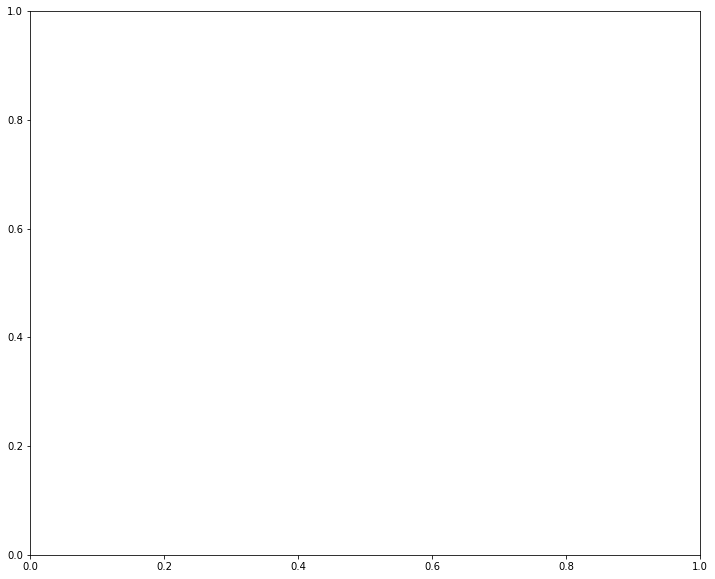

In [37]:
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(numerical.corr(),annot=True, ax=ax, cmap="seismic", center=0)

In [68]:
# die blaue sind strong negative correlation und die tiefrot positive correlation
# und keine ist größer als "0.9"

#### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

## Categorical Variables Transformation

### One Hot Encoder

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# need to reshape,see screenshot 
# we need two dimensial array. So choose also a second one 
# https://numpy.org/doc/stable/reference/generated/numpy.reshape.html?highlight=reshape

In [70]:
# solution see screenshot 6

In [71]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = [['Corporate Auto'], ['Personal Auto'], ['Special Auto']]
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)
inverted_2 = label_encoder.inverse_transform([argmax(onehot_encoded[1, :])])
print(inverted_2)
inverted_3 = label_encoder.inverse_transform([argmax(onehot_encoded[2, :])])
print(inverted_3)

[['Corporate Auto']
 ['Personal Auto']
 ['Special Auto']]
[0 1 2]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
['Corporate Auto']
['Personal Auto']
['Special Auto']


C:\Users\admin\anaconda3\envs\DA_env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [72]:
pd.get_dummies(categorical.policy_type)

,Corporate Auto,Personal Auto,Special Auto
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
10771,0,1,0
10772,0,1,0
10773,1,0,0
10774,0,1,0
